# KNN Programming Exercise
#### Submitted by Maria Eloisa H. Garcia

Instructions:
1. Choose a unique dataset from: https://archive.ics.uci.edu
2. Your dataset should be unique from your classmates otherwise no points will be given for this exercise.
### Complete the Tasks in bold

## Data Exploration

**TASK: Create a correlation heatmap.**

In [354]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [355]:
df = pd.read_csv("sobar-72.csv", sep=',', header=0)

df['ca_cervix'] = df['ca_cervix'].astype('int64')
df = df.dropna()

df.head()

,behavior_sexualRisk,behavior_eating,behavior_personalHygine,intention_aggregation,intention_commitment,attitude_consistency,attitude_spontaneity,norm_significantPerson,norm_fulfillment,perception_vulnerability,perception_severity,motivation_strength,motivation_willingness,socialSupport_emotionality,socialSupport_appreciation,socialSupport_instrumental,empowerment_knowledge,empowerment_abilities,empowerment_desires,ca_cervix
0,10,13,12,4,7,9,10,1,8,7,3,14,8,5,7,12,12,11,8,1
1,10,11,11,10,14,7,7,5,5,4,2,15,13,7,6,5,5,4,4,1
2,10,15,3,2,14,8,10,1,4,7,2,7,3,3,6,11,3,3,15,1
3,10,11,10,10,15,7,7,1,5,4,2,15,13,7,4,4,4,4,4,1
4,8,11,7,8,10,7,8,1,5,3,2,15,5,3,6,12,5,4,7,1


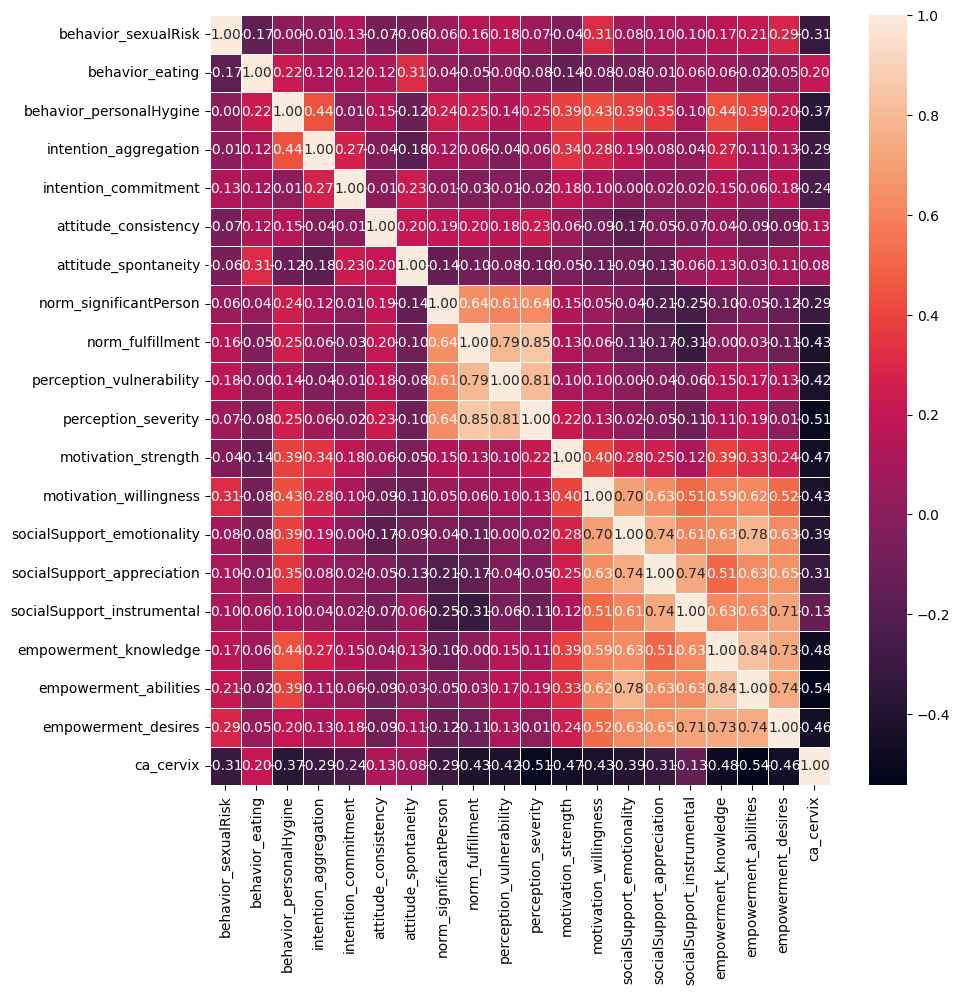

In [356]:
plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, fmt=".2f", linewidths=0.5)
plt.show()

**TASK: What are the top 5 correlated frequencies with the target\label?**

*Note: You many need to map the label to 0s and 1s.*

*Additional Note: We're looking for **absolute** correlation values.*

In [357]:
correlation = df.corr().abs()['ca_cervix']
top = correlation.drop('ca_cervix').nlargest(5)

print("Top 5 Correlated Frequencies:")
top

Top 5 Correlated Frequencies:


empowerment_abilities    0.542360
perception_severity      0.508217
empowerment_knowledge    0.481814
motivation_strength      0.467324
empowerment_desires      0.458815
Name: ca_cervix, dtype: float64

## Train | Test Split

Our approach here will be one of using Cross Validation on 90% of the dataset, and then judging our results on a final test set of 10% to evaluate our model.

**TASK: Split the data into features and labels, and then split into a training set and test set, with 90% for Cross-Validation training, and 10% for a final test set.**

*Note: Do not forget to put a random_state for reproducibility.*

In [358]:
from sklearn.model_selection import train_test_split

In [359]:
X = df.drop('ca_cervix',axis=1)
y = df['ca_cervix']

In [360]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

**TASK: Create a PipeLine that contains both a StandardScaler and a KNN model**

In [361]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [362]:
scaler = StandardScaler()
knn = KNeighborsClassifier()

In [363]:
knn.get_params().keys()

dict_keys(['algorithm', 'leaf_size', 'metric', 'metric_params', 'n_jobs', 'n_neighbors', 'p', 'weights'])

In [364]:
operations = [('scaler',scaler),('knn',knn)]
pipe = Pipeline(operations)

**TASK: Perform a grid-search with the pipeline to test various values of k and report back the best performing parameters.**

In [365]:
from sklearn.model_selection import GridSearchCV

In [366]:
k_values = list(range(1,20))
k_values

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [367]:
param_grid = {'knn__n_neighbors': k_values}
full_cv_classifier = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')

In [368]:
full_cv_classifier.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19]},
             scoring='accuracy')

In [369]:
full_cv_classifier.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('knn', KNeighborsClassifier(n_neighbors=11))],
 'verbose': False,
 'scaler': StandardScaler(),
 'knn': KNeighborsClassifier(n_neighbors=11),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'knn__algorithm': 'auto',
 'knn__leaf_size': 30,
 'knn__metric': 'minkowski',
 'knn__metric_params': None,
 'knn__n_jobs': None,
 'knn__n_neighbors': 11,
 'knn__p': 2,
 'knn__weights': 'uniform'}

**Observation:** The GridSearch recommends a K = 11

**(HARD) TASK: Using the .cv_results_ dictionary, see if you can create a plot of the mean test scores per K value.**

In [370]:
full_cv_classifier.cv_results_['mean_test_score']

array([0.85769231, 0.7974359 , 0.86153846, 0.84487179, 0.81282051,
       0.84487179, 0.86025641, 0.86025641, 0.86025641, 0.86025641,
       0.89230769, 0.86025641, 0.87564103, 0.84487179, 0.87692308,
       0.81153846, 0.81153846, 0.79615385, 0.82692308])

In [371]:
mean_ts = full_cv_classifier.cv_results_['mean_test_score']
k_val = [int(param['knn__n_neighbors']) for param in full_cv_classifier.cv_results_['params']]

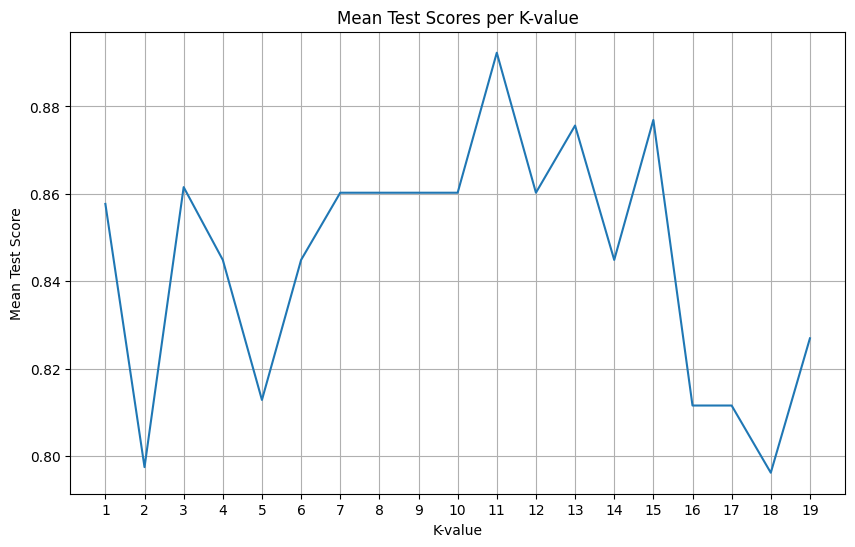

In [372]:
plt.figure(figsize=(10, 6))
plt.plot(k_val, mean_ts)
plt.title('Mean Test Scores per K-value')
plt.xlabel('K-value')
plt.ylabel('Mean Test Score')
plt.grid(True)

plt.xticks(range(min(k_val), max(k_val)+1))

plt.show()

### Final Model Evaluation

**TASK: Using the grid classifier object from the previous step, get a final performance classification report and confusion matrix.**

The GridSearch recommends a K = 11

In [373]:
from sklearn.metrics import classification_report,confusion_matrix

In [374]:
scaler = StandardScaler()
knn11 = KNeighborsClassifier(n_neighbors=11)
operations = [('scaler',scaler),('knn11',knn11)]

pipe = Pipeline(operations)

In [375]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn11', KNeighborsClassifier(n_neighbors=11))])

In [376]:
pipe_pred = pipe.predict(X_test)
print("Classification Report:")
print(classification_report(y_test, pipe_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.67      1.00      0.80         4
           1       1.00      0.50      0.67         4

    accuracy                           0.75         8
   macro avg       0.83      0.75      0.73         8
weighted avg       0.83      0.75      0.73         8



In [377]:
print("Confusion Matrix:")
print(confusion_matrix(y_test, pipe_pred))

Confusion Matrix:
[[4 0]
 [2 2]]
